# Customer Churn Analysis Test

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("./CustomerChurn.csv")


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.describe()    #to show all numerical values

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

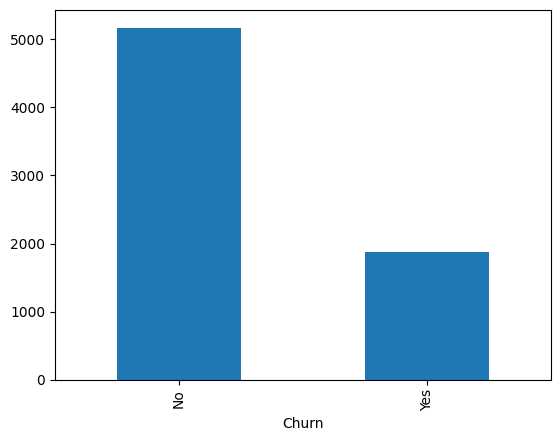

In [9]:
data['Churn'].value_counts().plot(kind='bar')
plt.show()

In [10]:
data['TotalCharges'].dtypes

dtype('O')

In [11]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [14]:
data.loc[data['Churn']=="Yes"].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [15]:
churn_no = data.loc[data['Churn'] == "No"]
churn_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


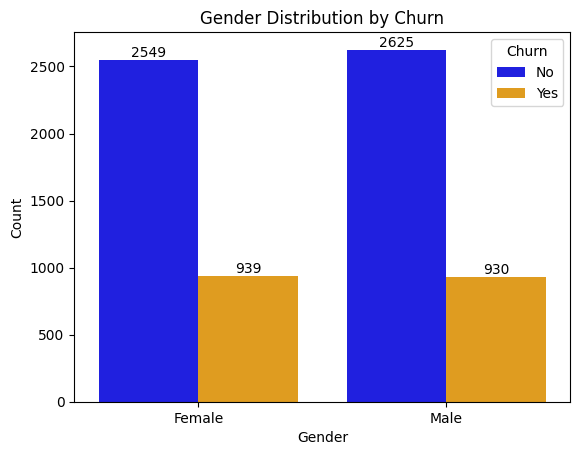

In [16]:
sns.countplot(data=data, x='gender', hue='Churn', palette=['blue', 'orange'])
plt.title('Gender Distribution by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

###### The chart in cell index 14 provides a visual representation of the relationship between gender (`Male` and `Female`) and churn status (`Yes` or `No`). It helps us understand whether there is a significant difference in churn behavior between male and female customers. The count of customers in each category is displayed, with bars color-coded to distinguish between churned and non-churned customers. This visualization can be used to identify any gender-based trends or patterns in customer churn, which may inform targeted strategies for customer retention.


In [17]:
100*len(data['TotalCharges'])/100

7043.0

In [18]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
# Calculate the percentage of each value in the 'Churn' column
churn_percentage = data['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [20]:
data['Churn'].value_counts()*100/len(data['Churn'])


Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [21]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
data['TotalCharges'].mean()

2283.3004408418656

In [23]:
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [24]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16248\1586669023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


In [25]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# Create a new column 'TenureGroup' based on the 'tenure' column
bins = [0, 12, 24, 36, 48, 60, data['tenure'].max()]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61+']
data['TenureGroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True)

# Display the first few rows to verify
print(data[['tenure', 'TenureGroup']].head())

   tenure TenureGroup
0       1        1-12
1      34       25-36
2       2        1-12
3      45       37-48
4       2        1-12


In [27]:
data['tenure'].max()

72

In [28]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [29]:
data.drop(columns=['TenureGroup'], inplace=True)

In [30]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
bins = [0,12,24,36,48,60,data['tenure'].max()]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61+']
data['TenureGroup'] = pd.cut(data['tenure'],bins = bins, labels = labels, right=True)

In [32]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [33]:
data[['tenure','TenureGroup']]

,tenure,TenureGroup
0,1,1-12
1,34,25-36
2,2,1-12
3,45,37-48
4,2,1-12
...,...,...
7038,24,13-24
7039,72,61+
7040,11,1-12
7041,4,1-12


### Distribution of Customers Across Tenure Groups

In [34]:
data['TenureGroup'].value_counts()

TenureGroup
1-12     2175
61+      1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

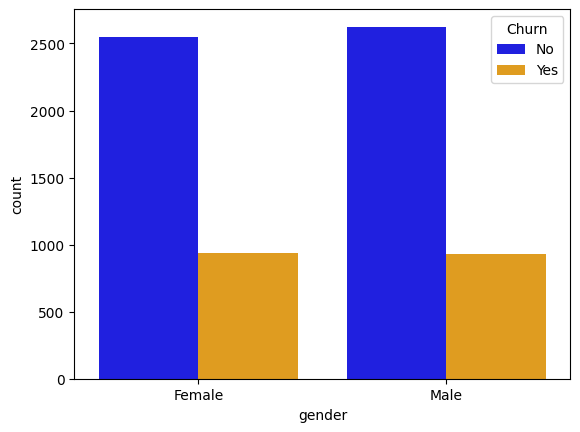

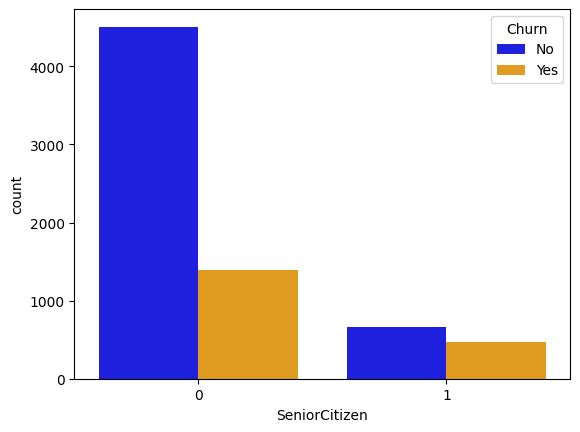

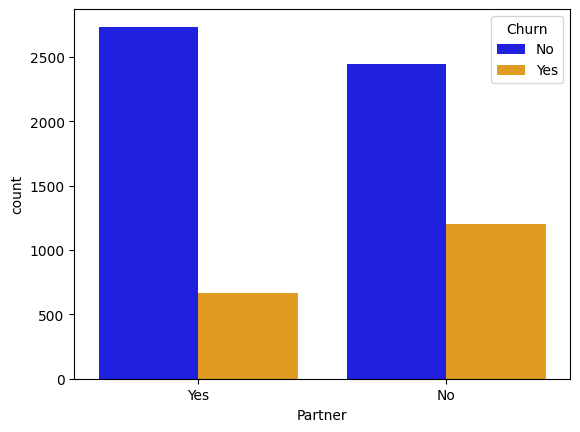

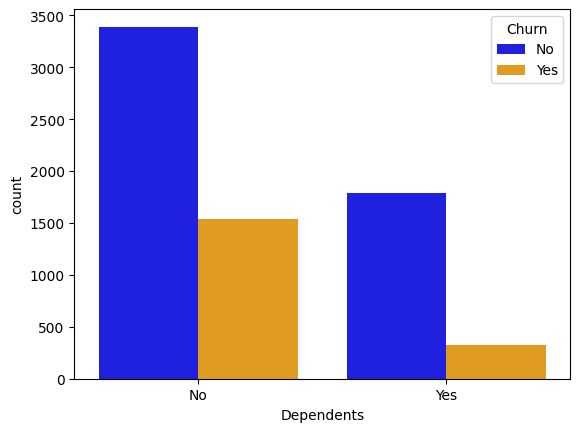

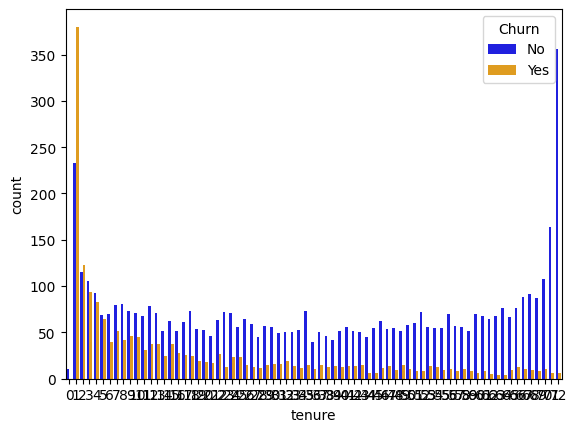

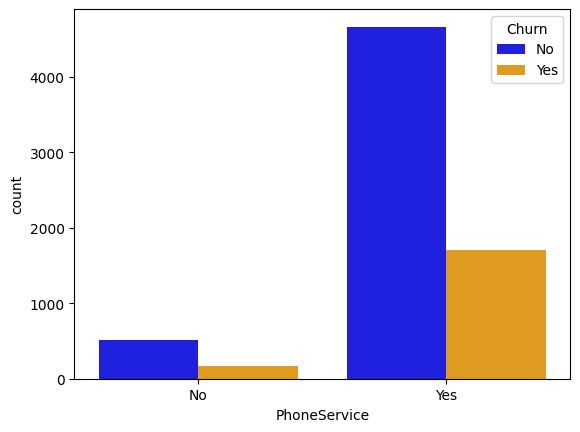

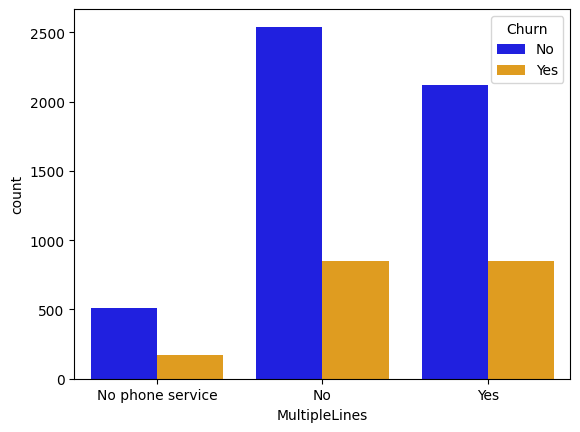

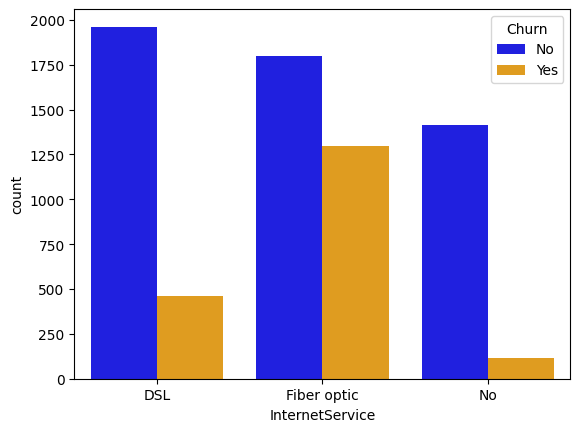

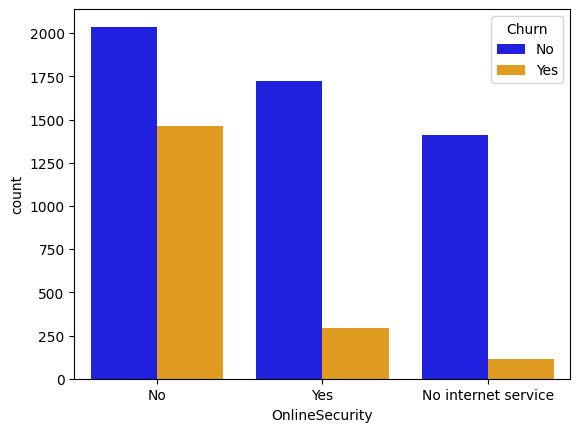

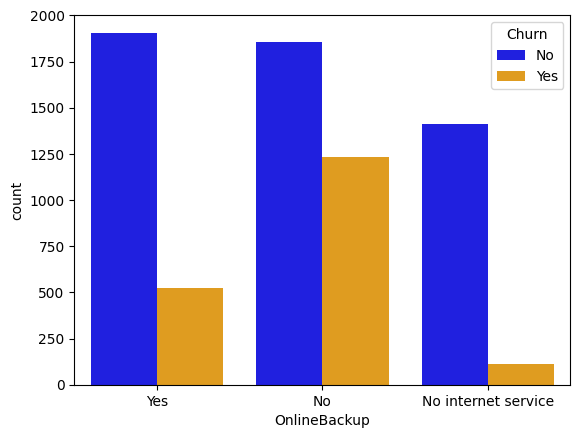

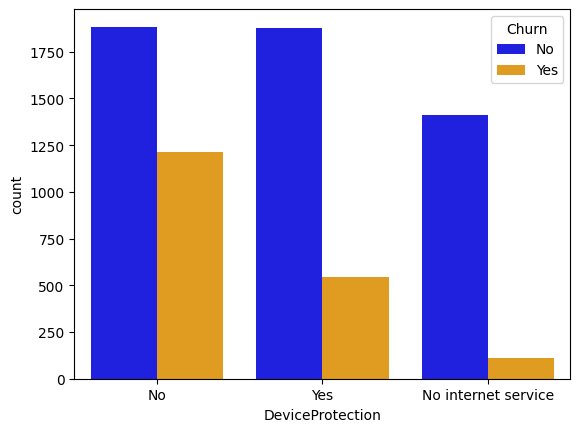

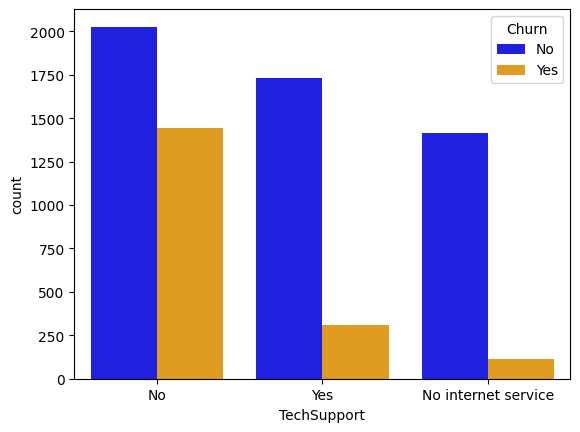

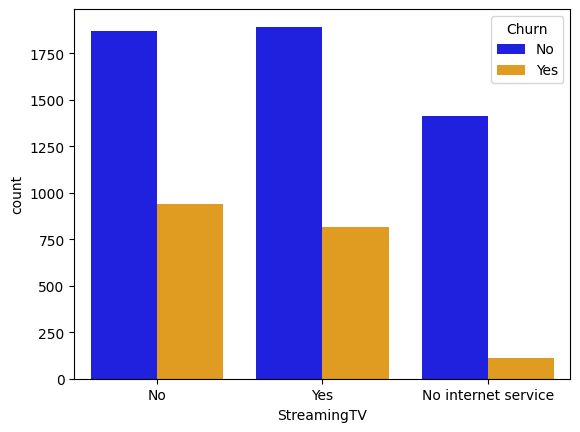

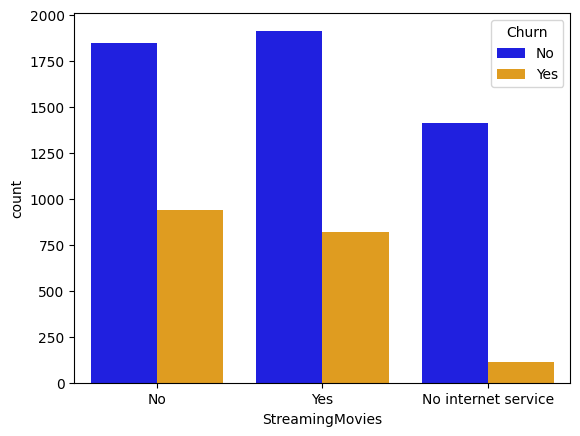

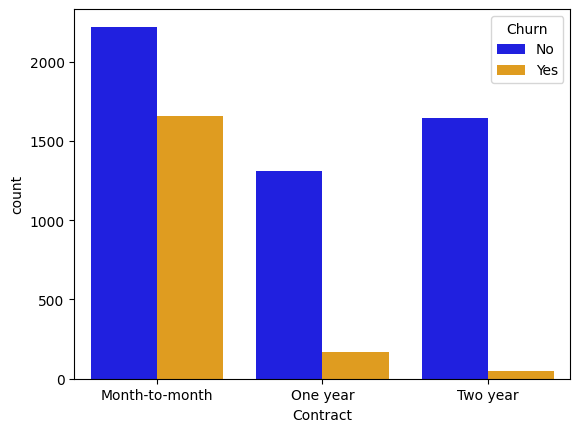

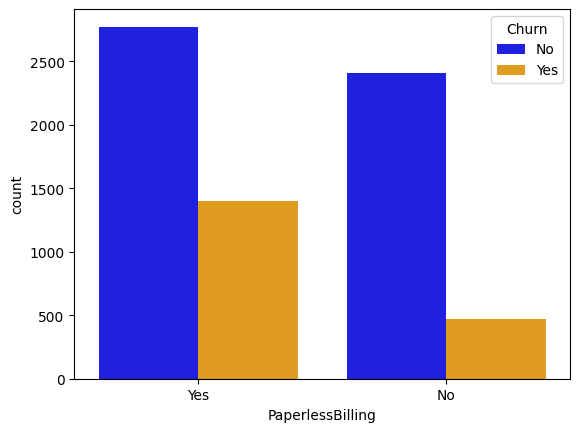

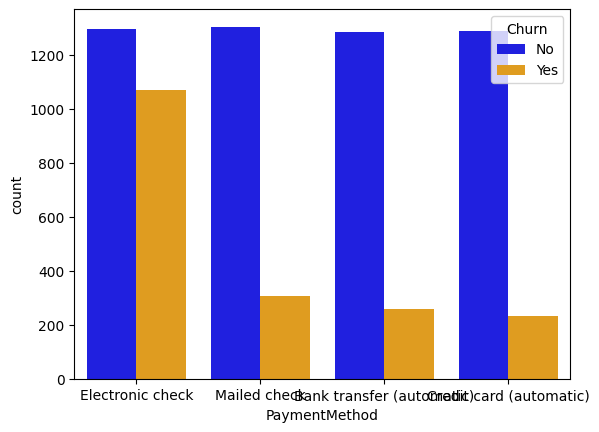

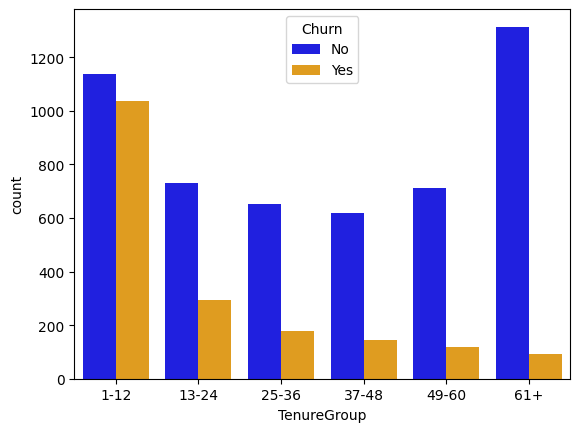

In [35]:
for predictor in data.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges']):
    plt.figure()
    sns.countplot(data=data, x=predictor, hue='Churn', palette=['blue', 'orange'])

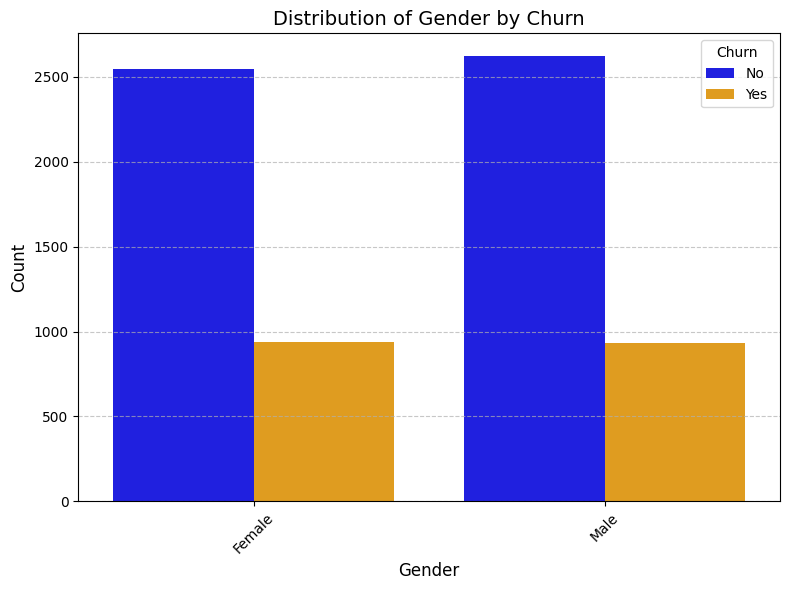

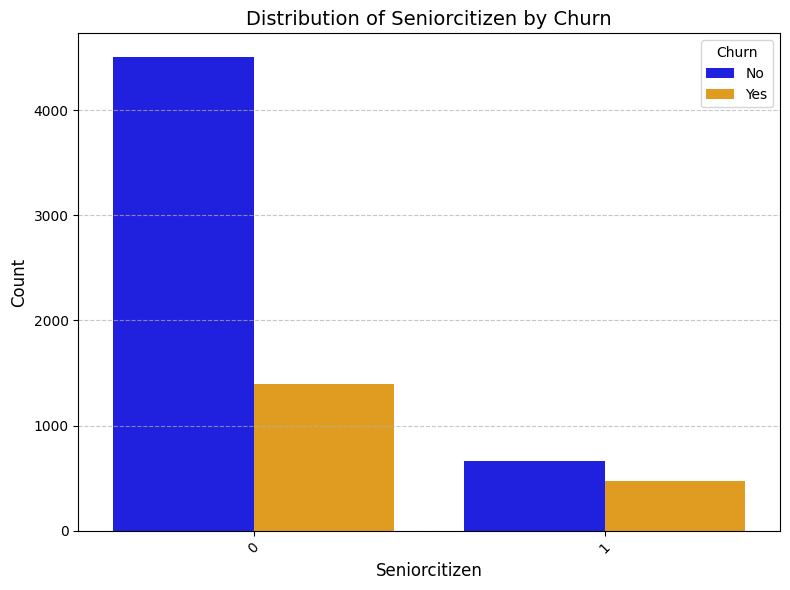

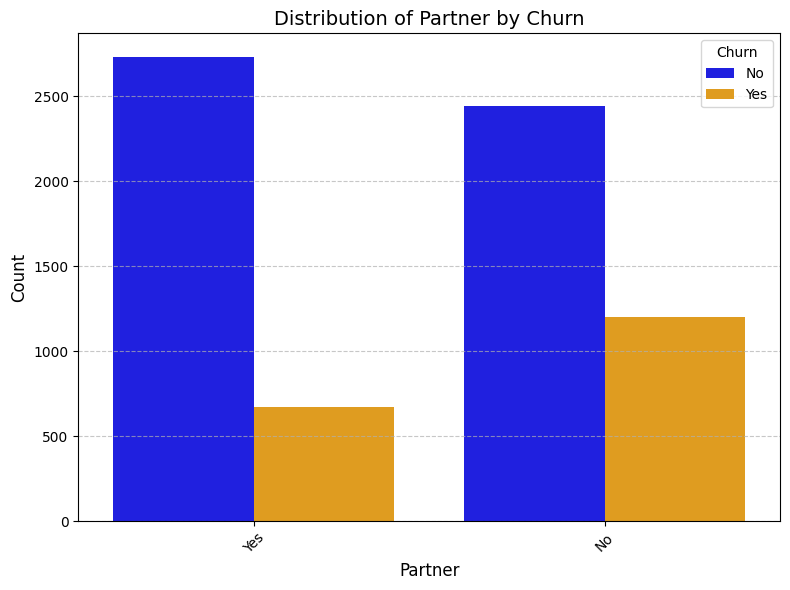

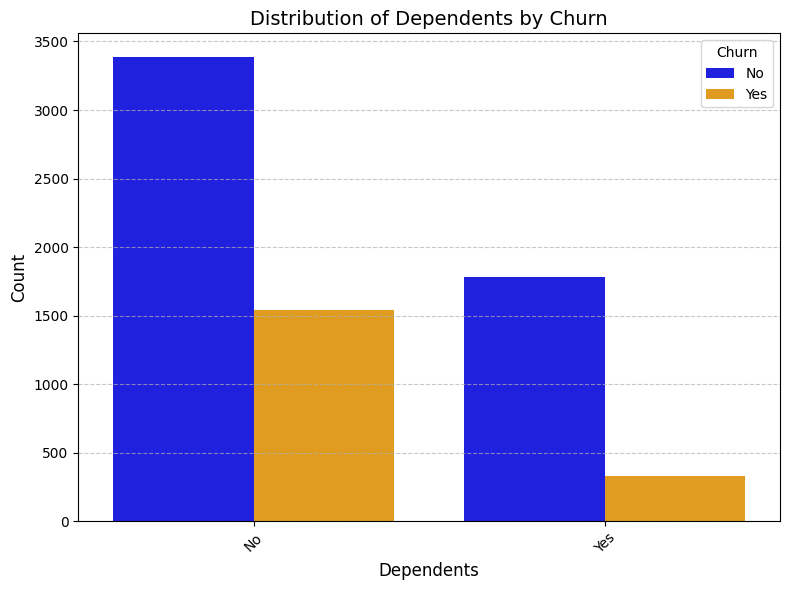

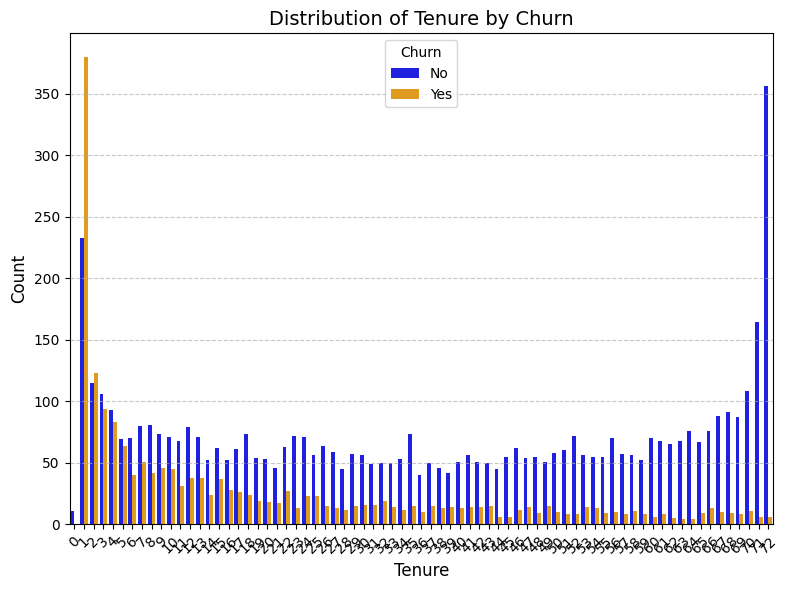

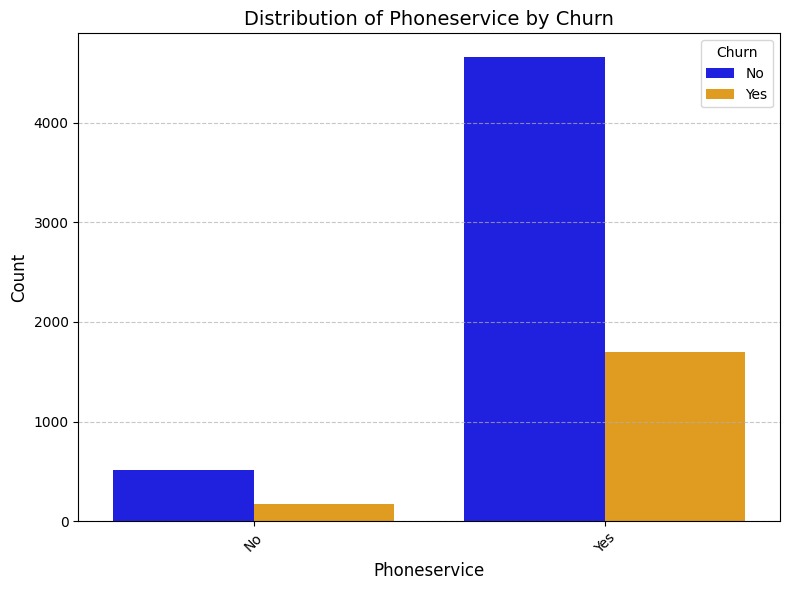

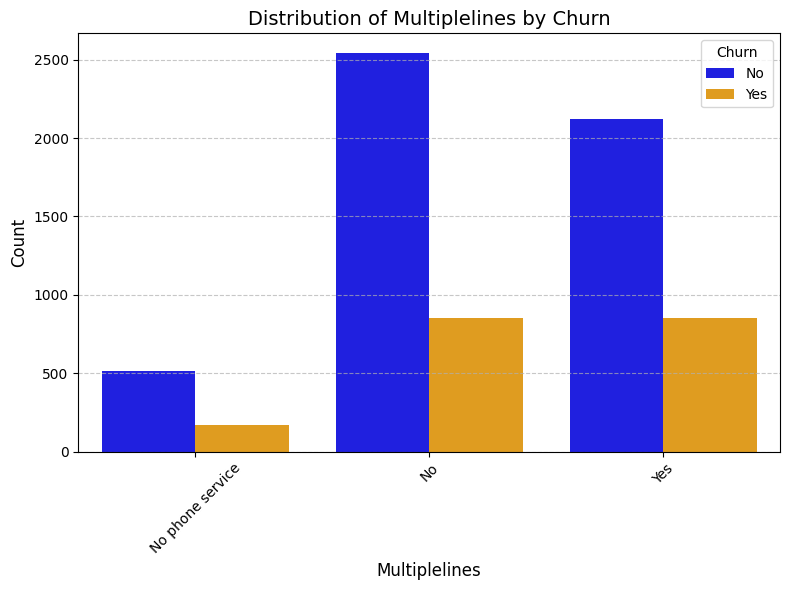

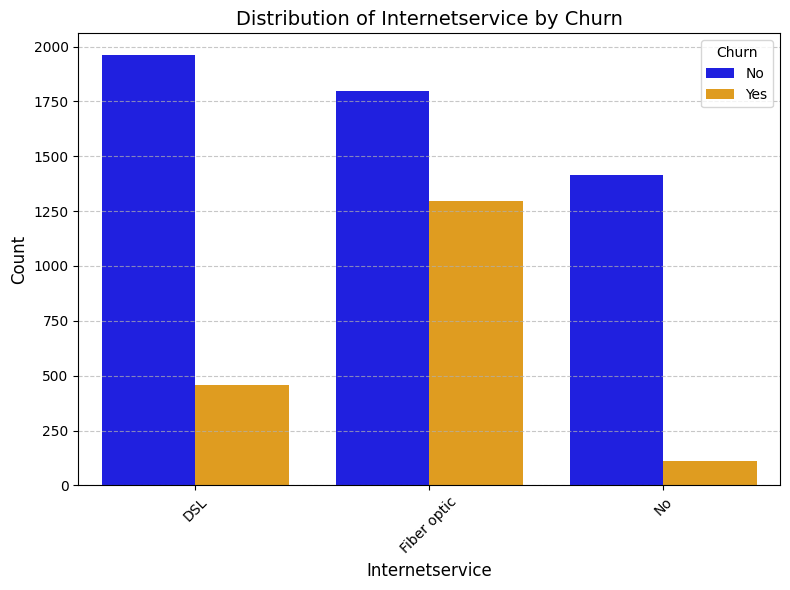

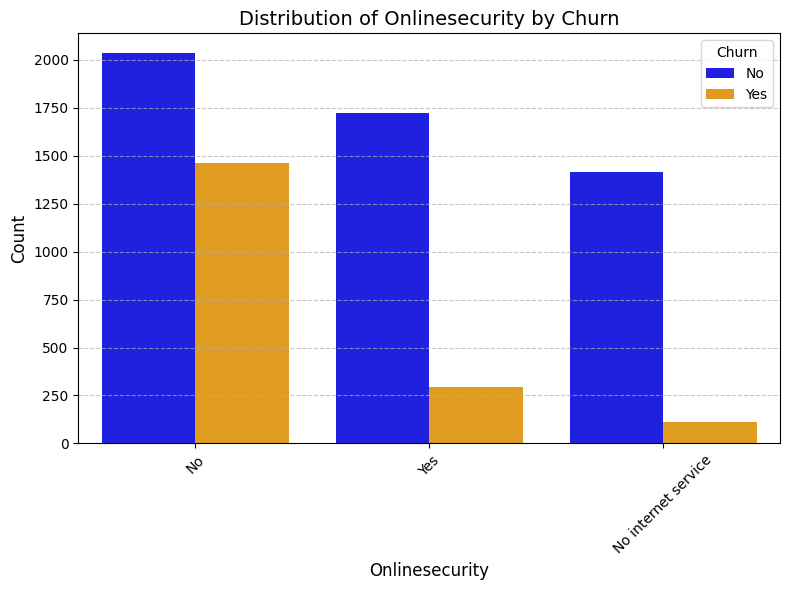

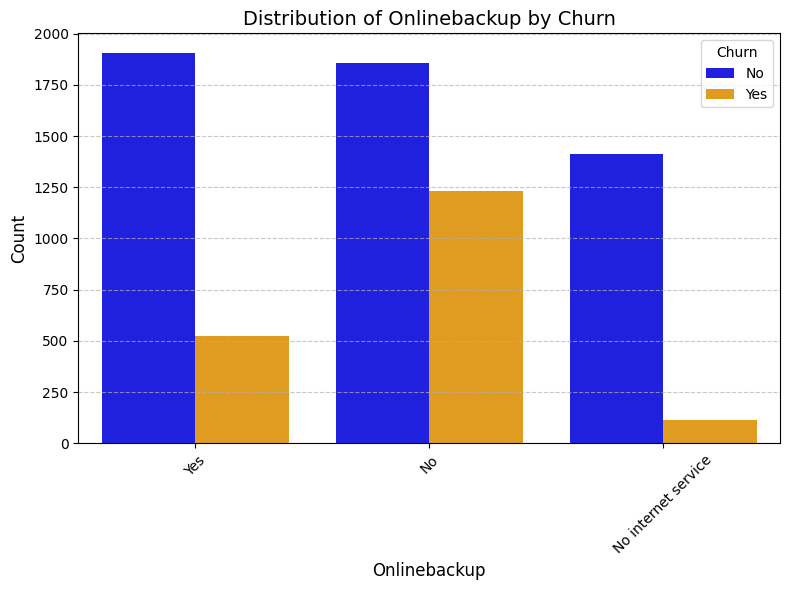

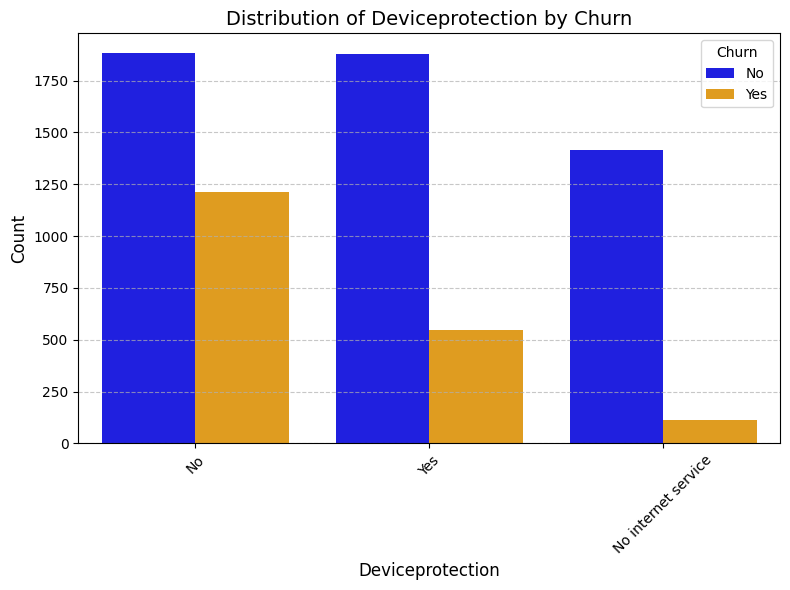

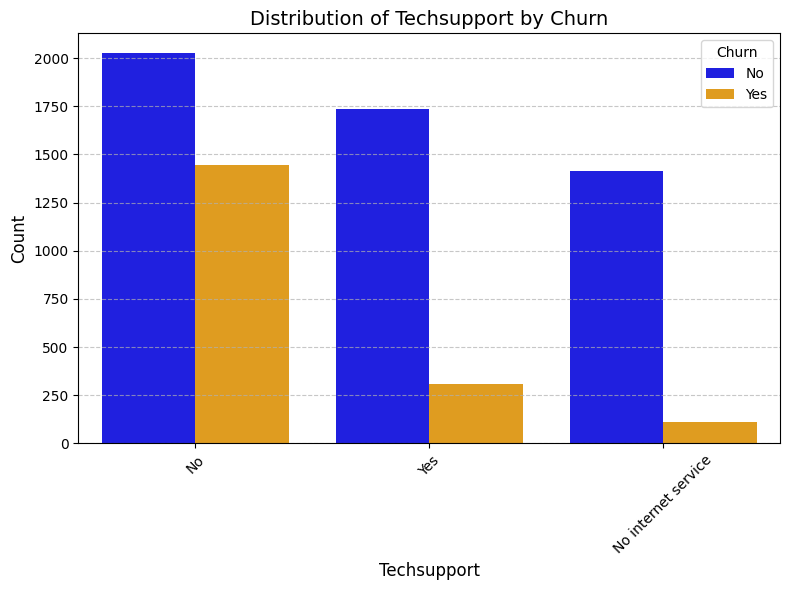

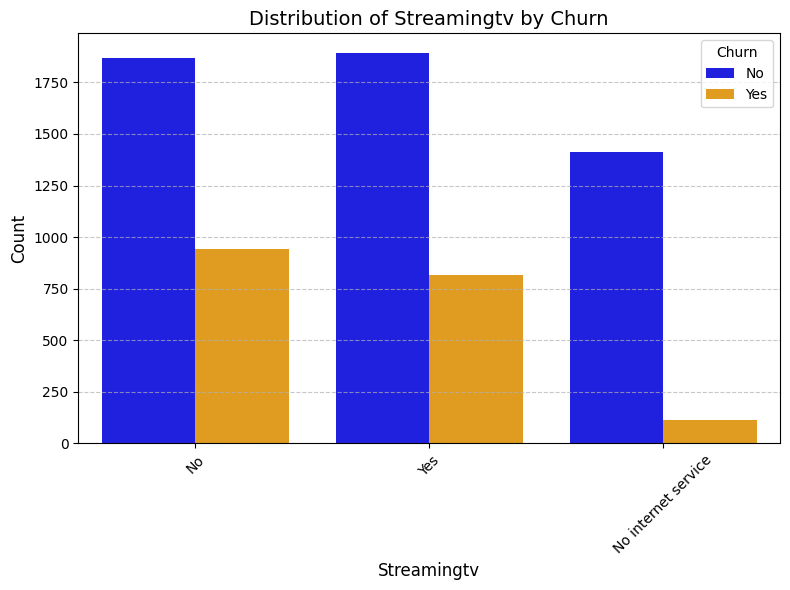

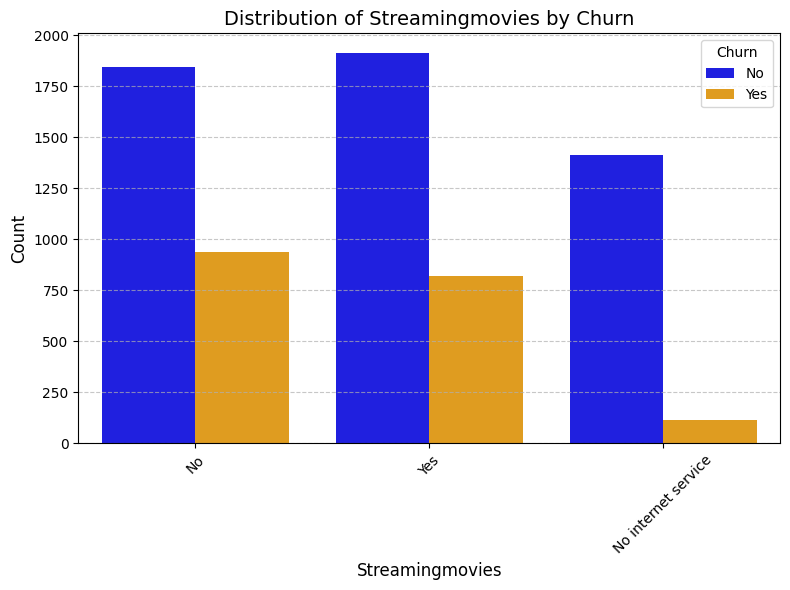

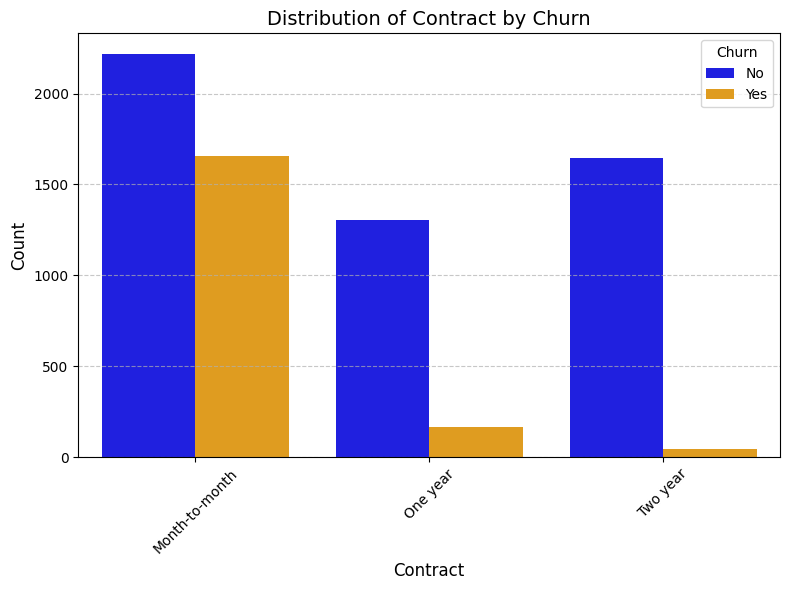

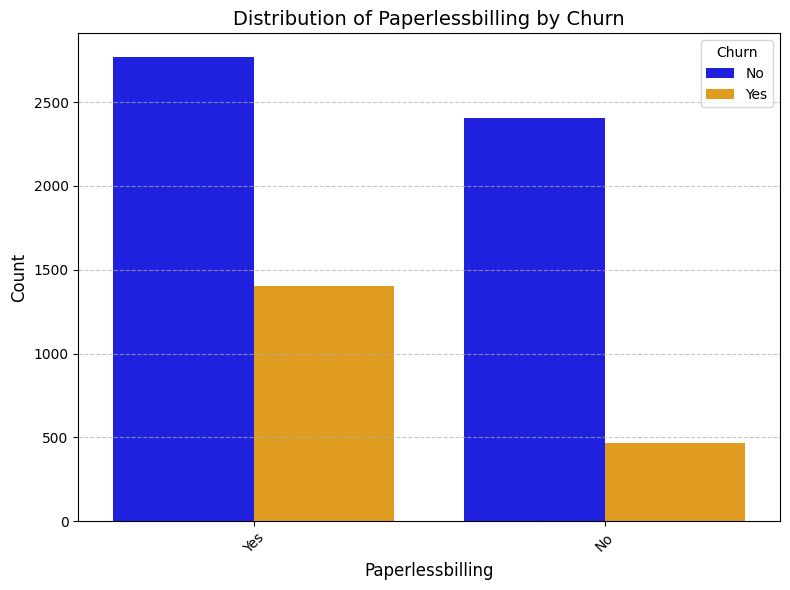

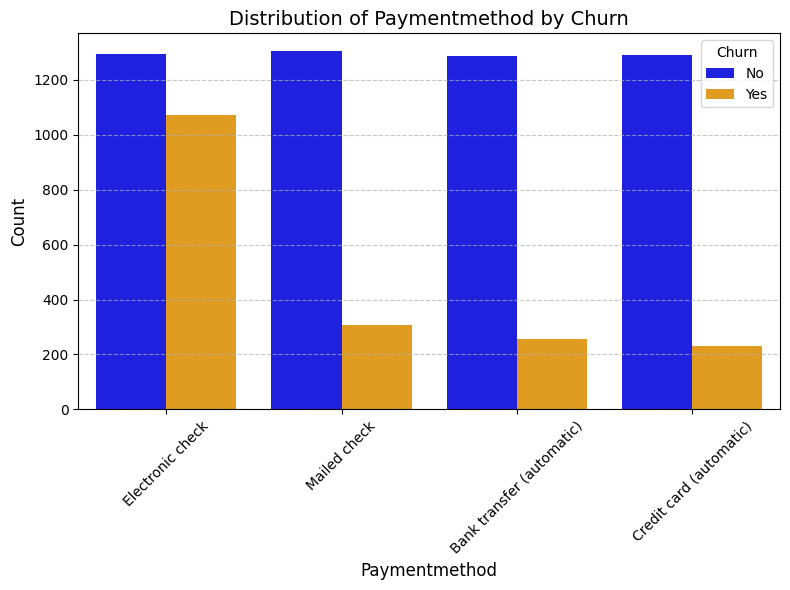

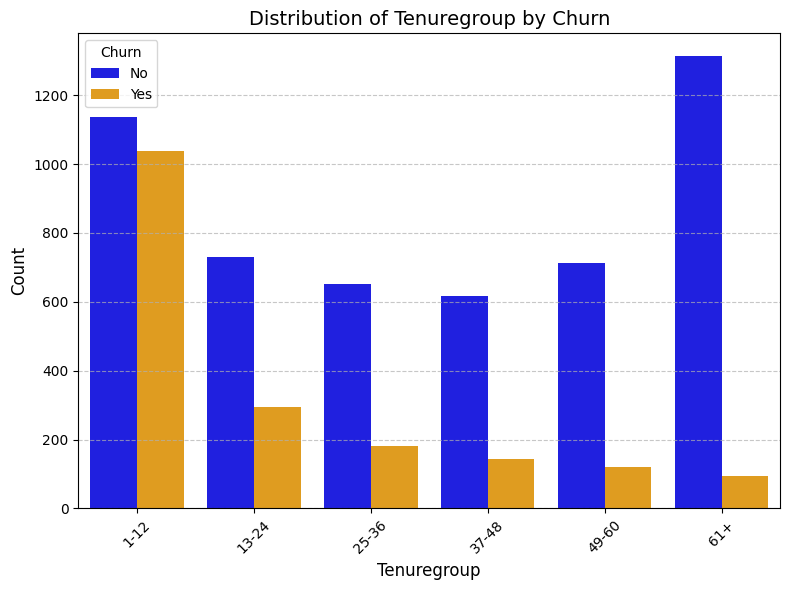

In [36]:
for predictor in data.drop(columns=['customerID', 'Churn', 'TotalCharges', 'MonthlyCharges']):
    plt.figure(figsize=(8, 6))  # Set figure size for better clarity
    sns.countplot(data=data, x=predictor, hue='Churn', palette=['blue', 'orange'])
    
    # Add a dynamic title based on the predictor
    plt.title(f'Distribution of {predictor.capitalize()} by Churn', fontsize=14)
    plt.xlabel(predictor.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)
    
    # Add gridlines for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
    

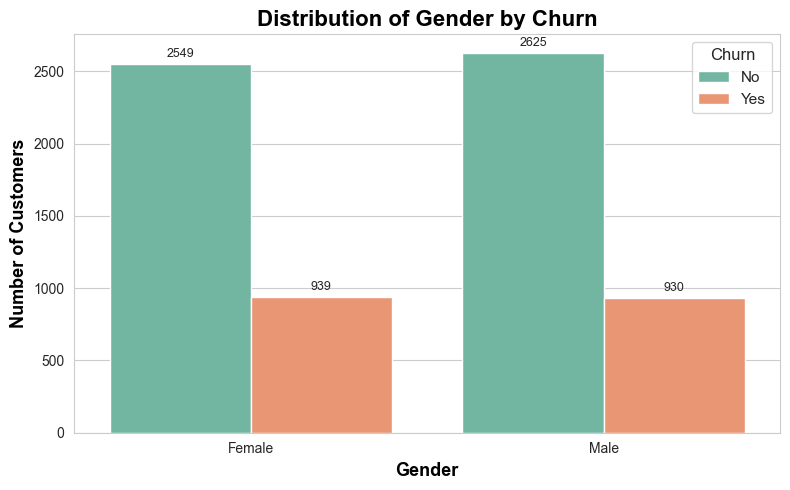

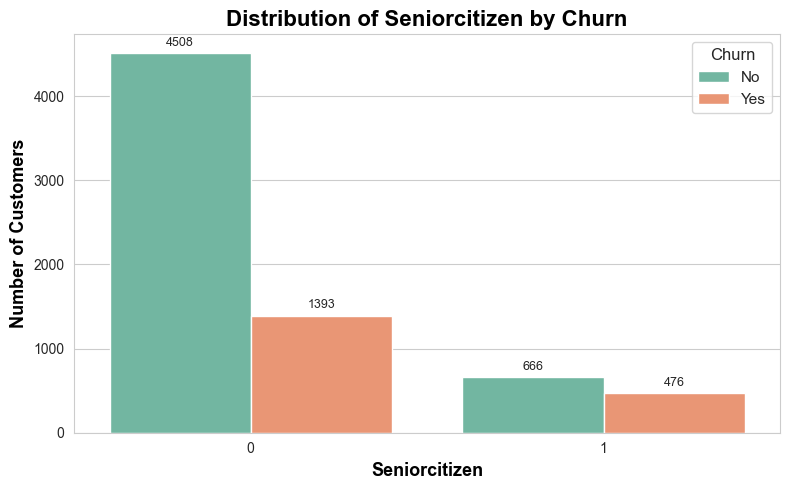

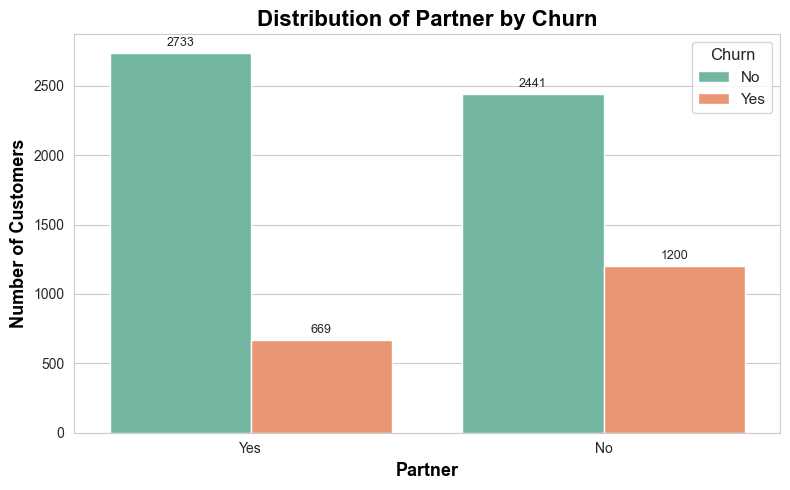

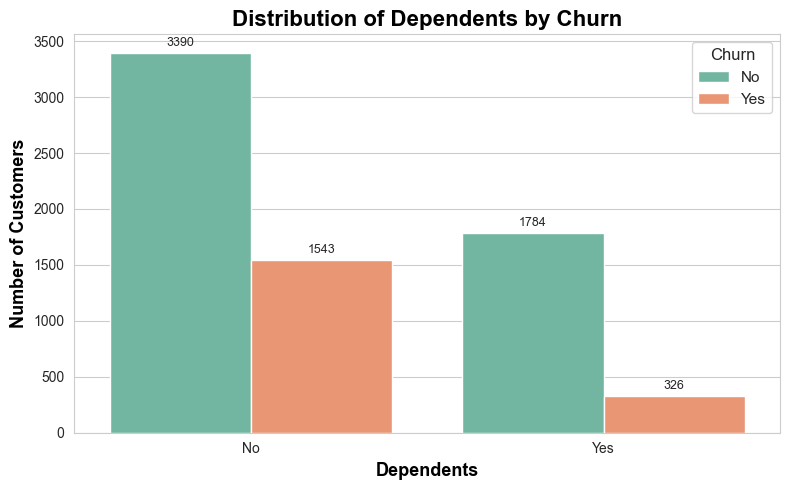

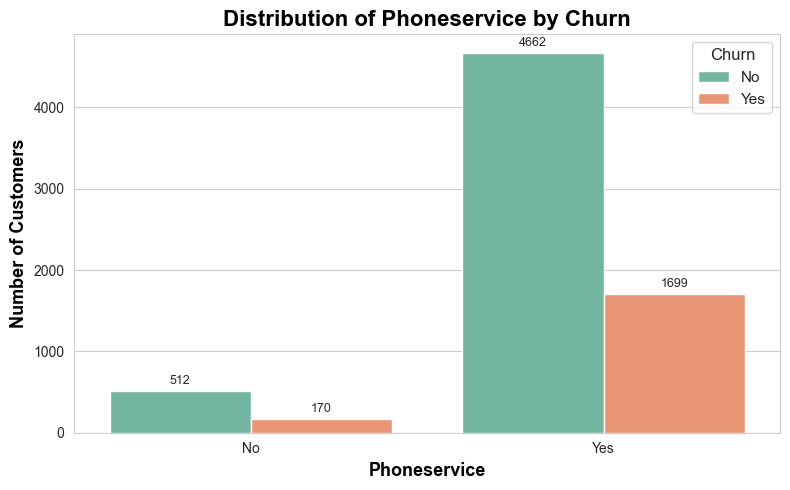

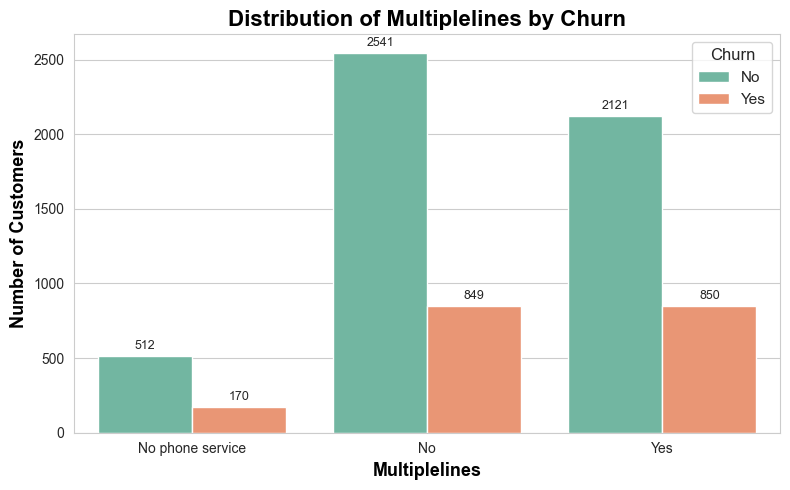

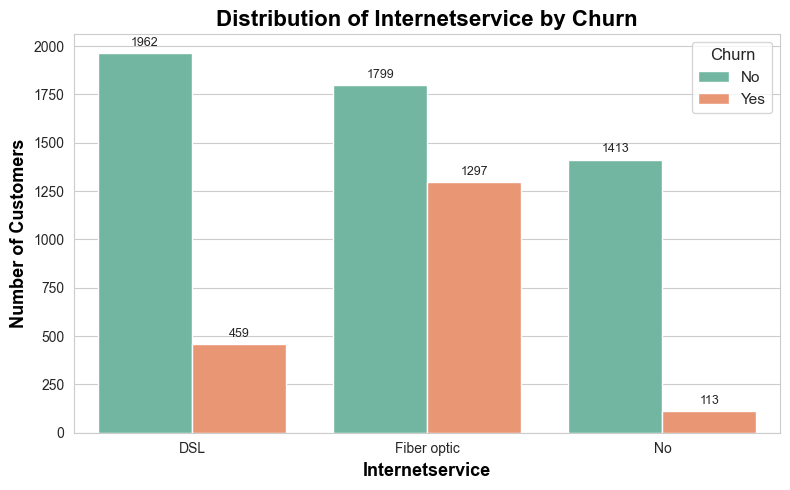

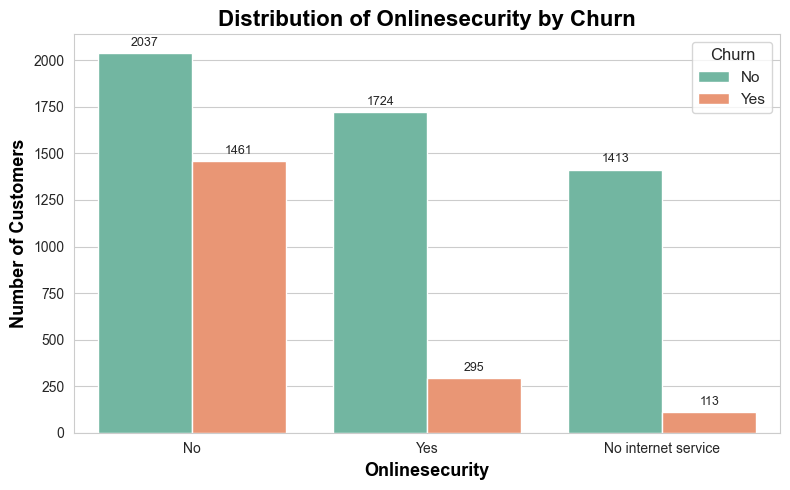

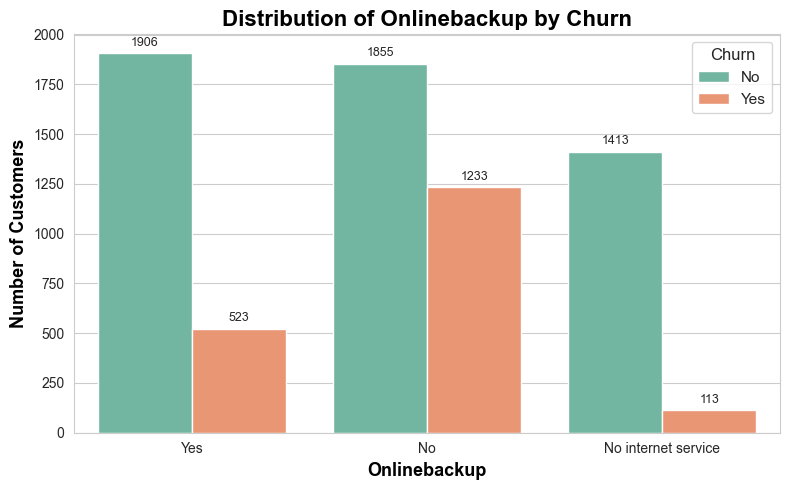

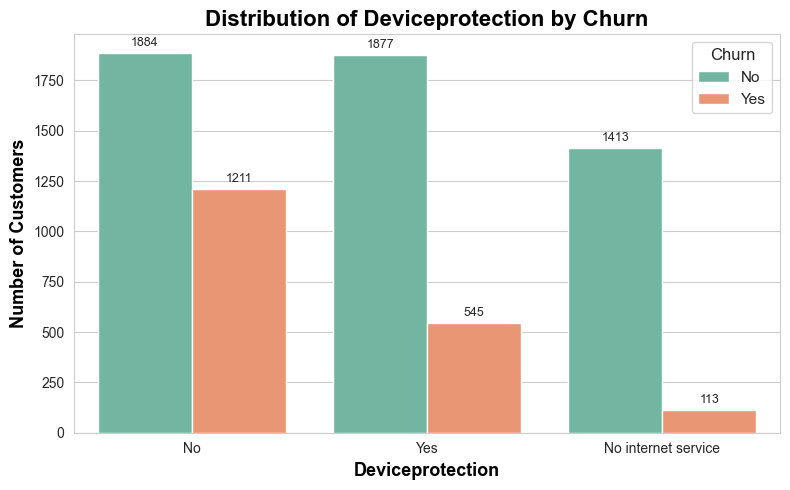

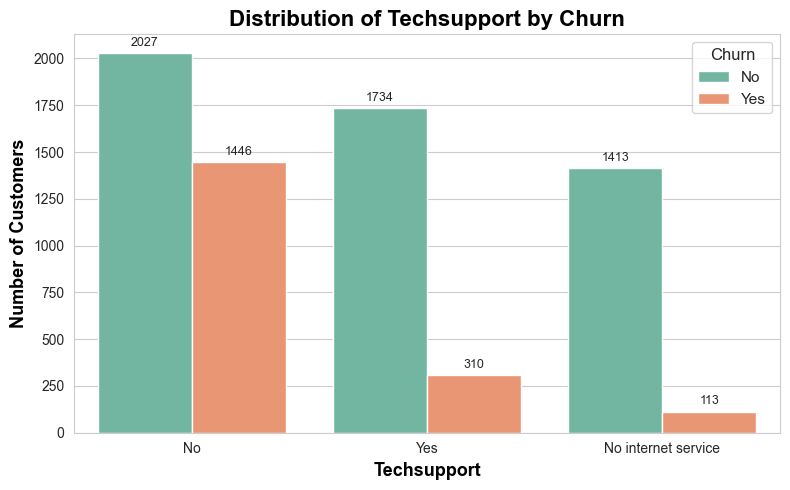

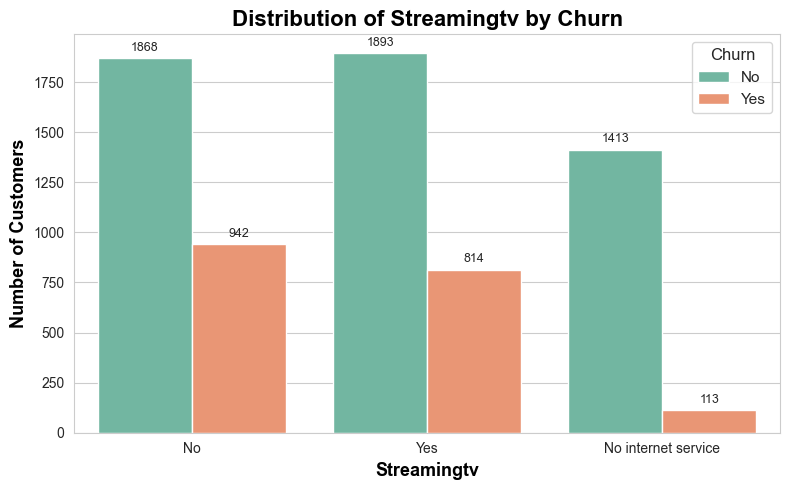

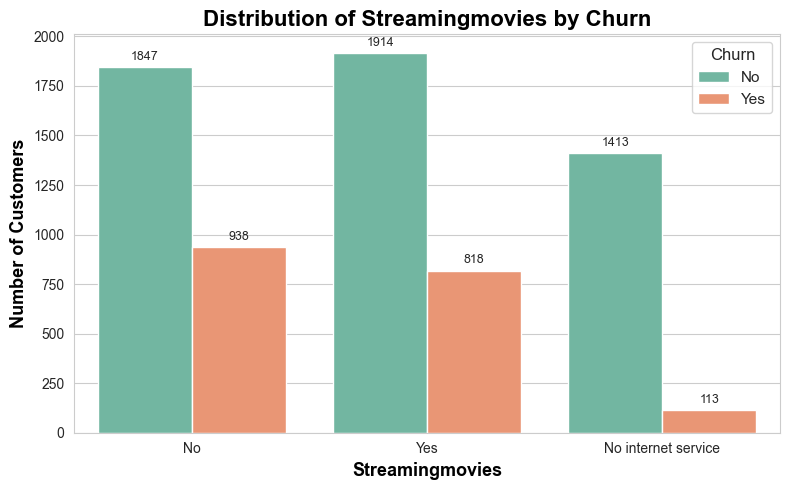

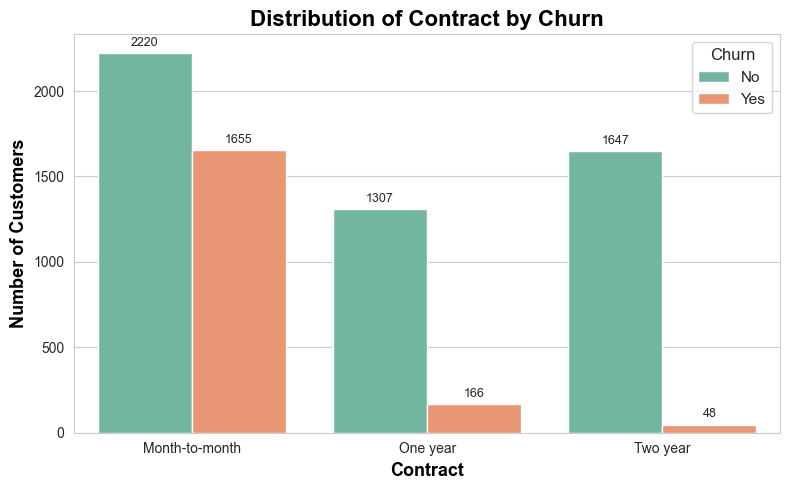

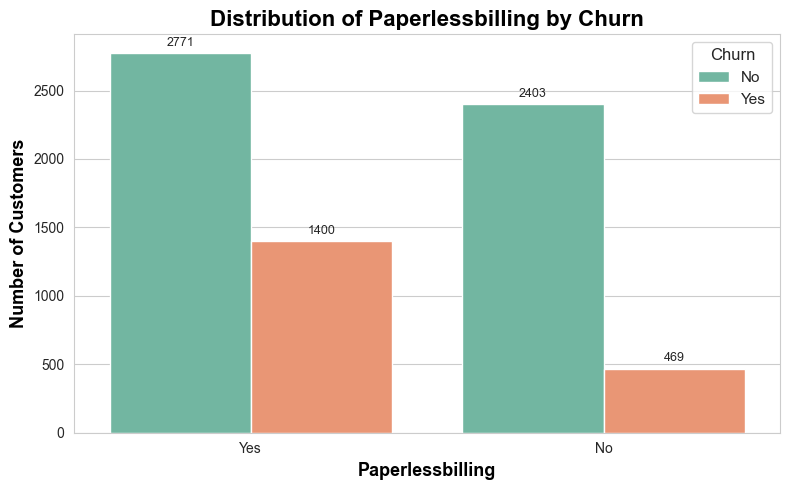

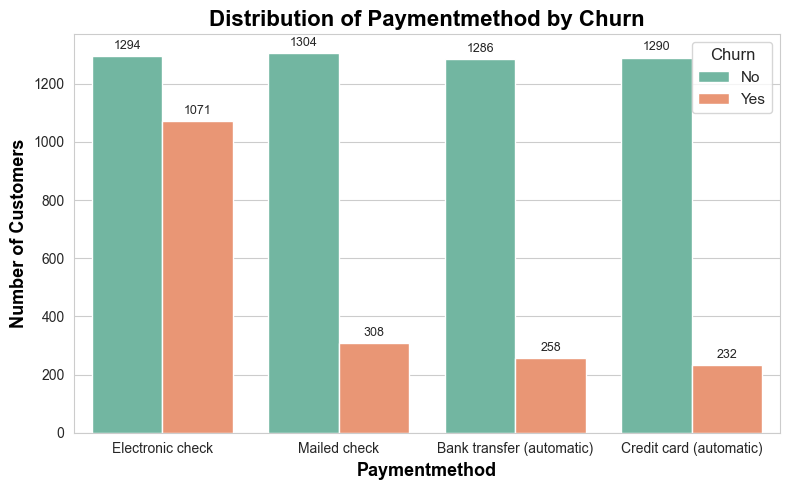

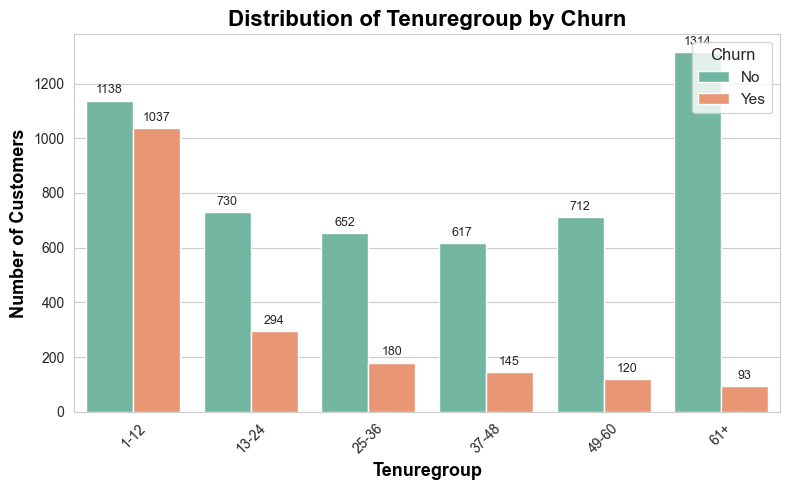

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")
palette = "Set2"

# Loop through predictors
for predictor in data.drop(columns=['customerID', 'Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=predictor, hue='Churn', palette=palette)

    # Rotate x-axis labels if too many categories
    if data[predictor].nunique() > 4:
        plt.xticks(rotation=45)

    # Title with black color
    plt.title(f"Distribution of {predictor.replace('_', ' ').title()} by Churn", 
              fontsize=16, fontweight='bold', color='black')

    # X and Y labels with black color
    plt.xlabel(predictor.replace("_", " ").title(), fontsize=13, fontweight='bold', color='black')
    plt.ylabel("Number of Customers", fontsize=13, fontweight='bold', color='black')

    # Legend
    plt.legend(title="Churn", title_fontsize=12, fontsize=11, loc='upper right')

    # Bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

    plt.tight_layout()
    plt.show()

    

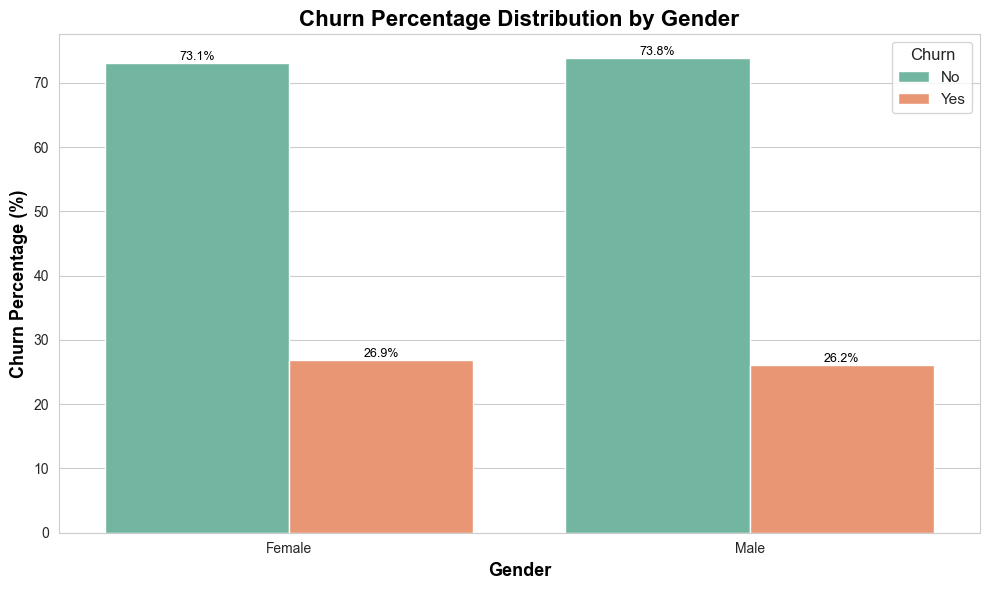

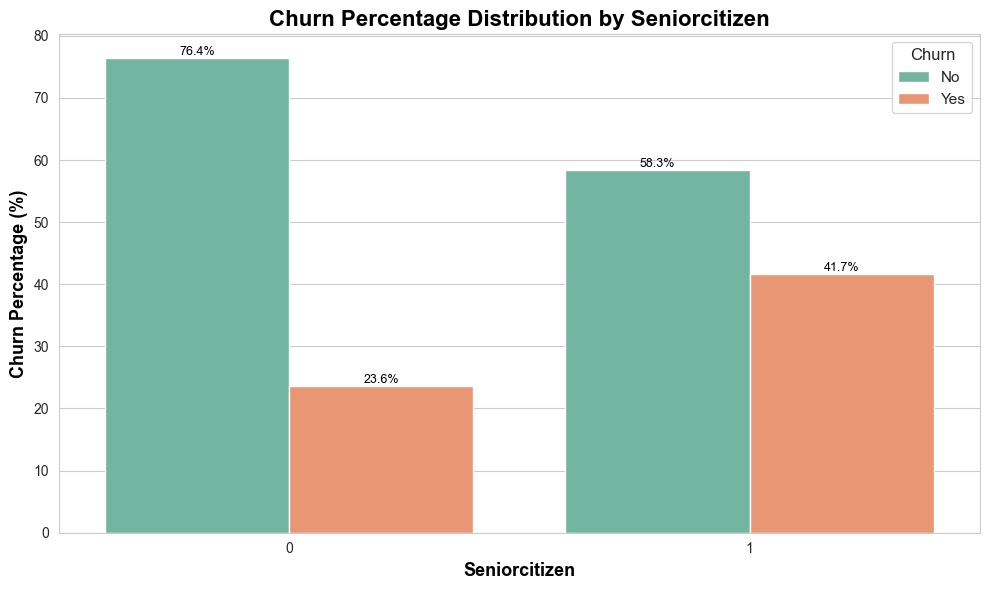

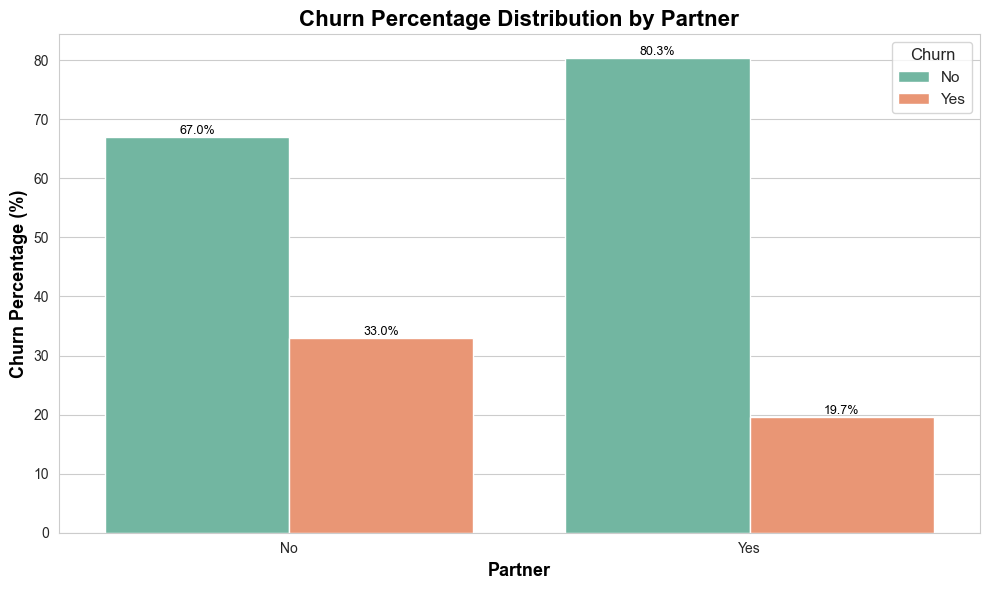

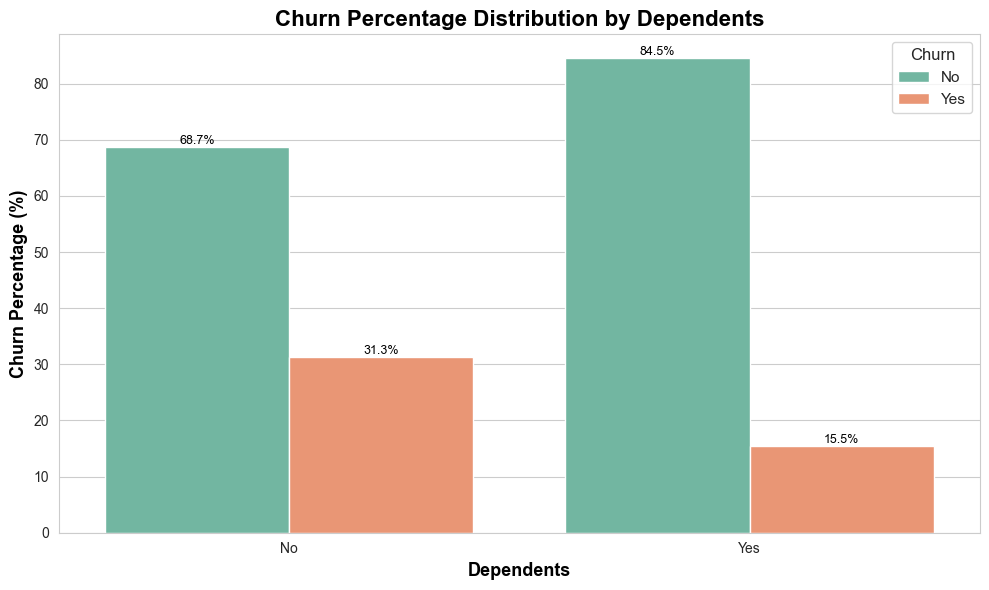

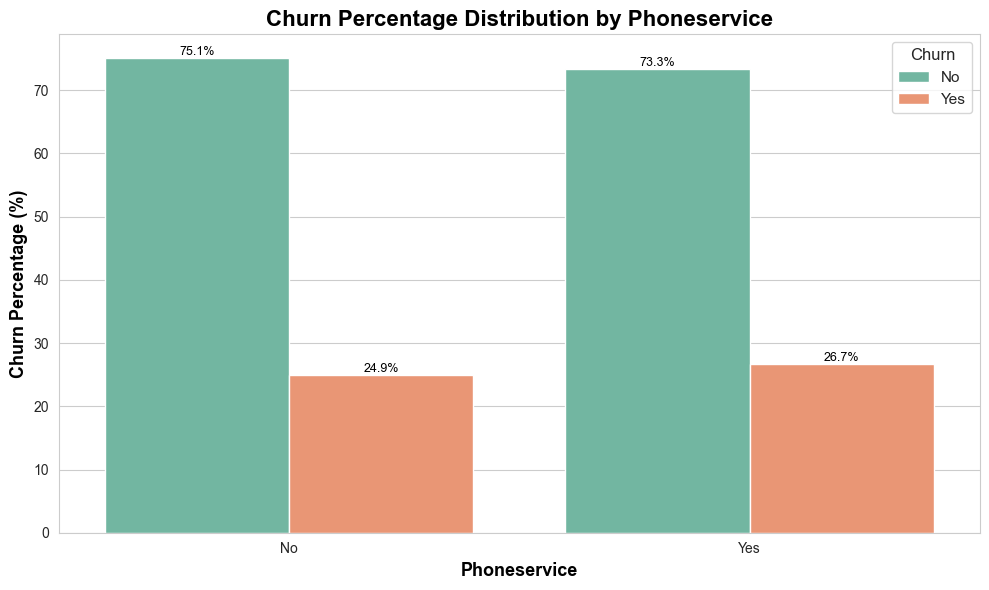

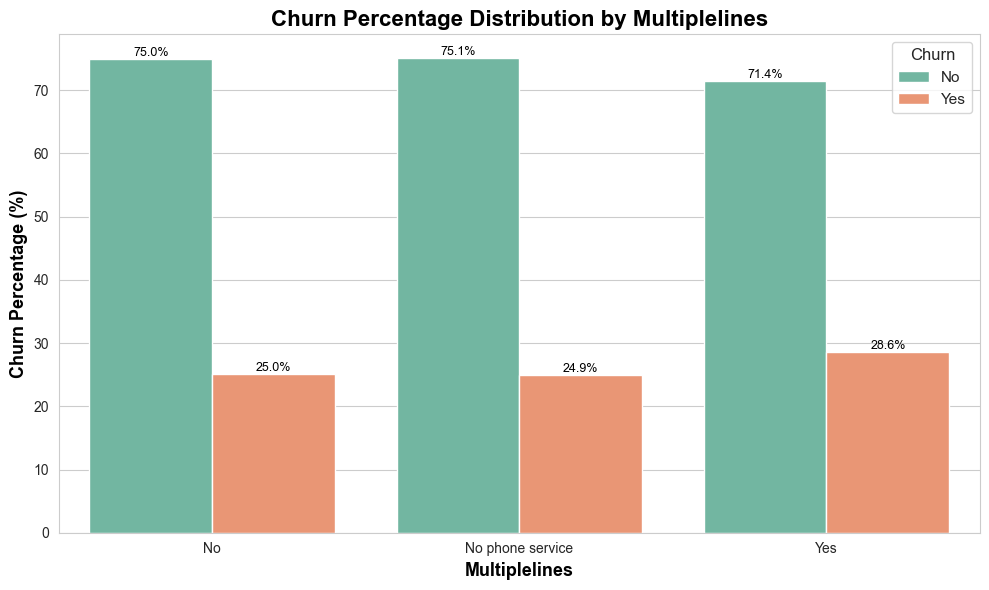

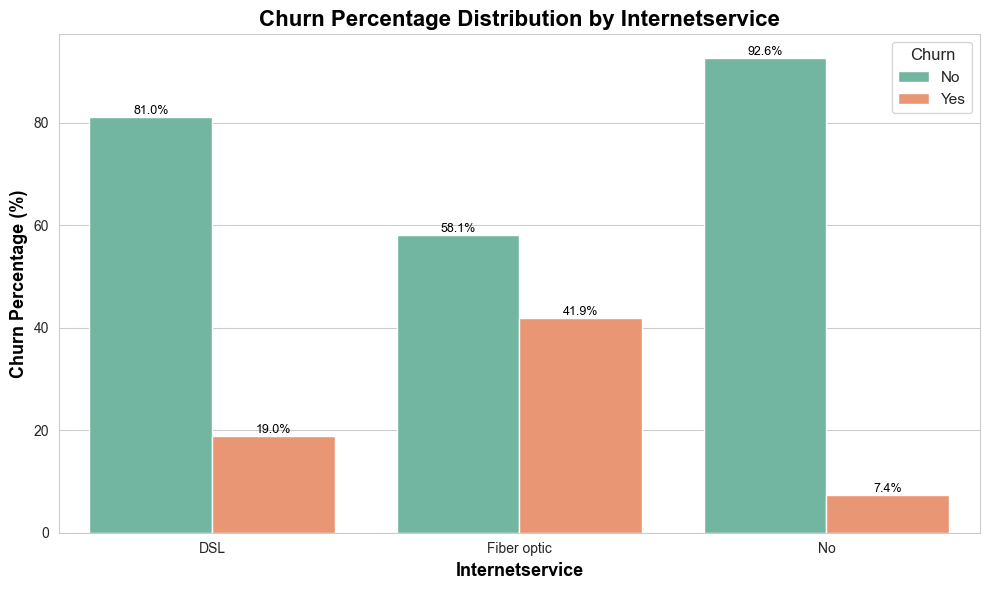

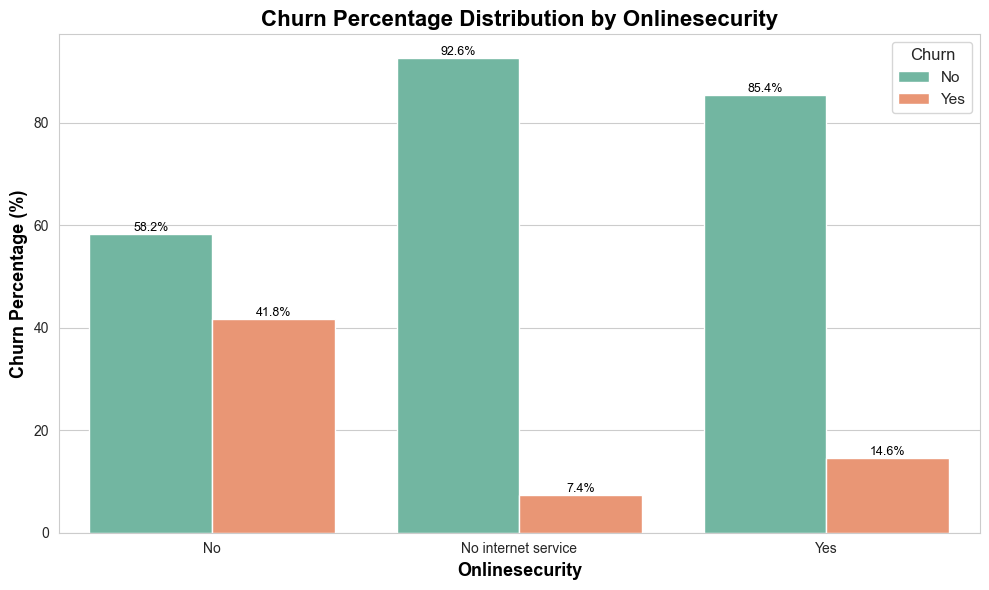

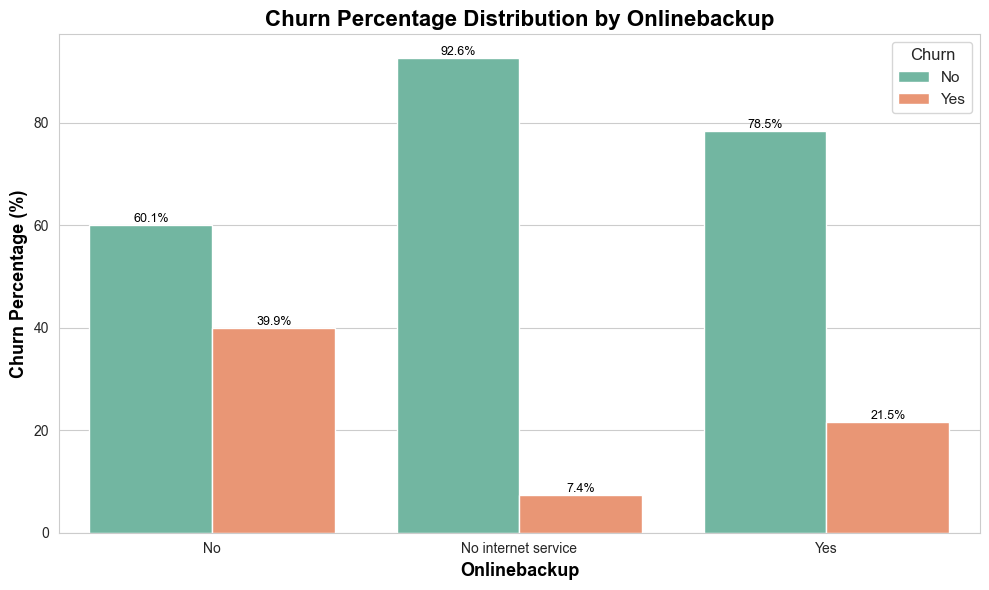

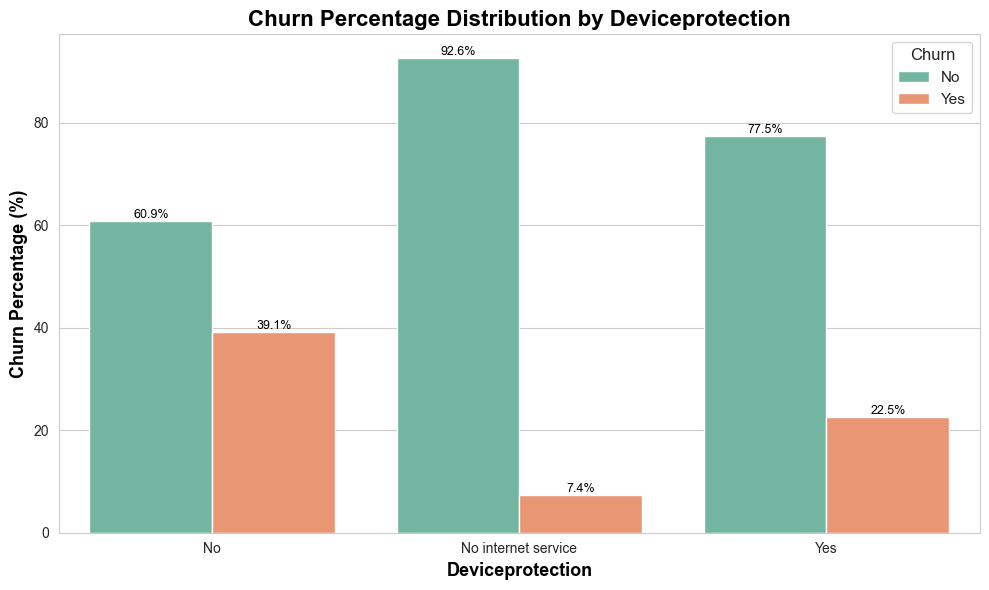

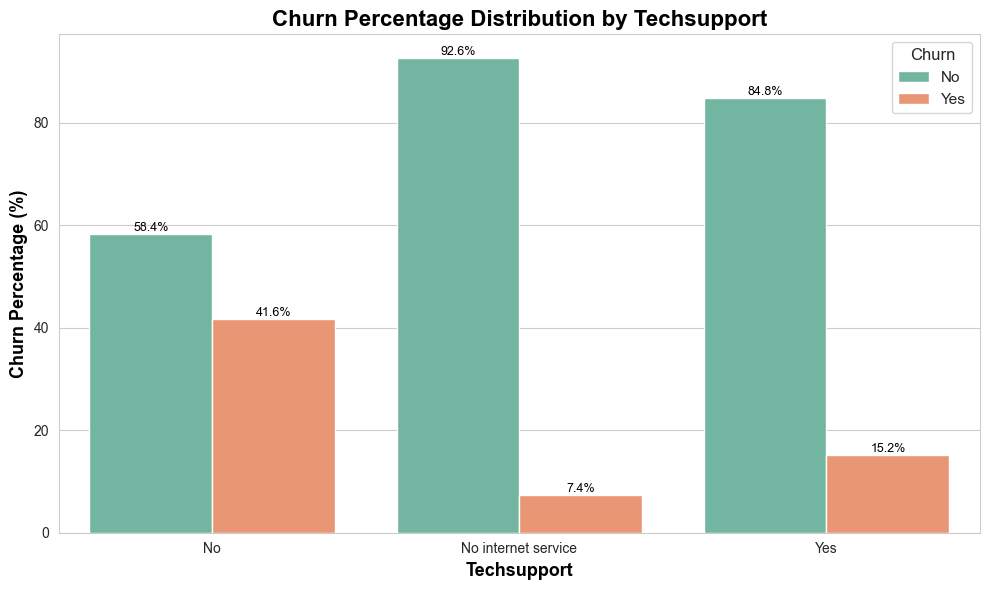

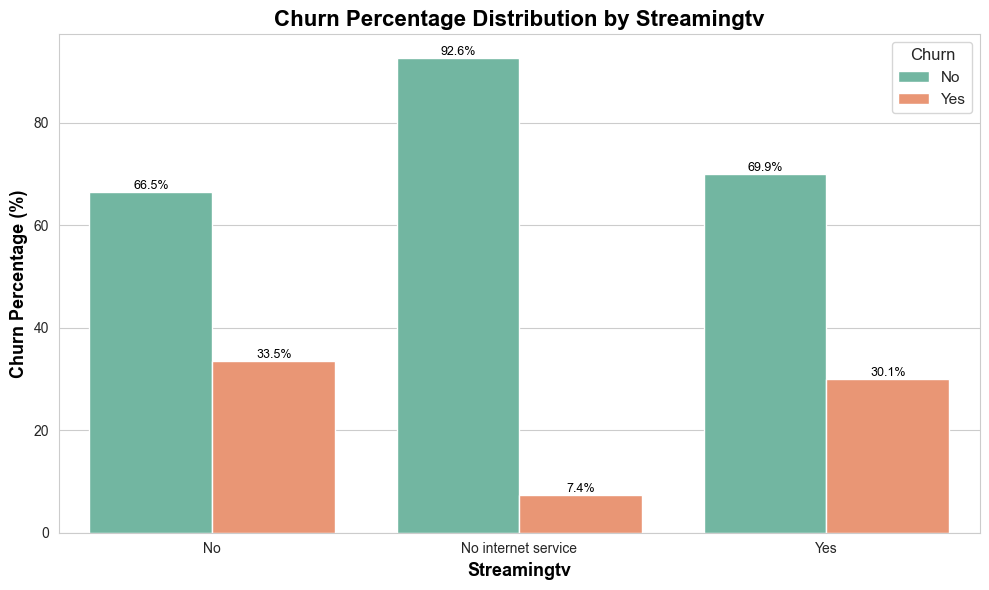

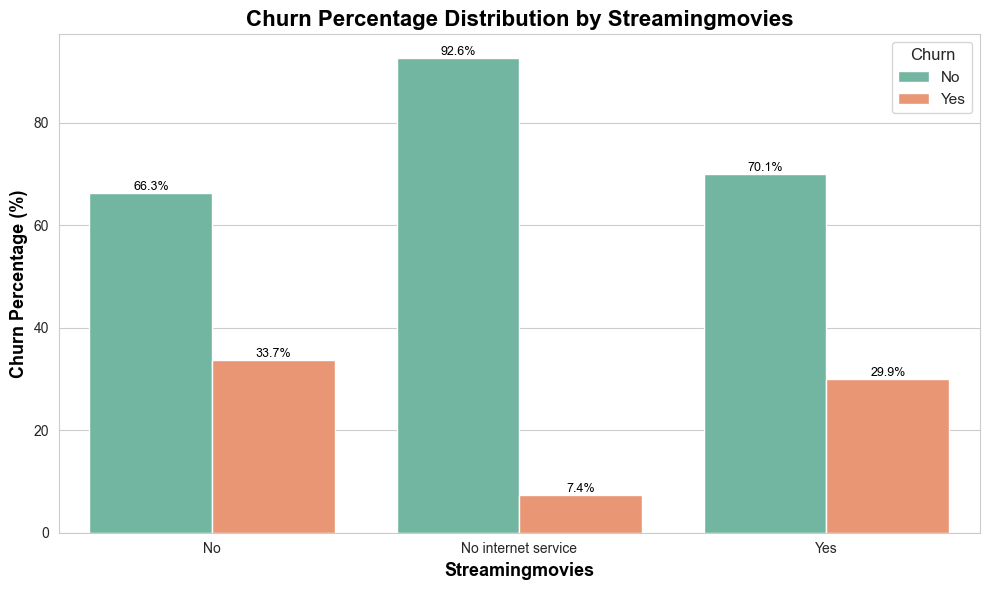

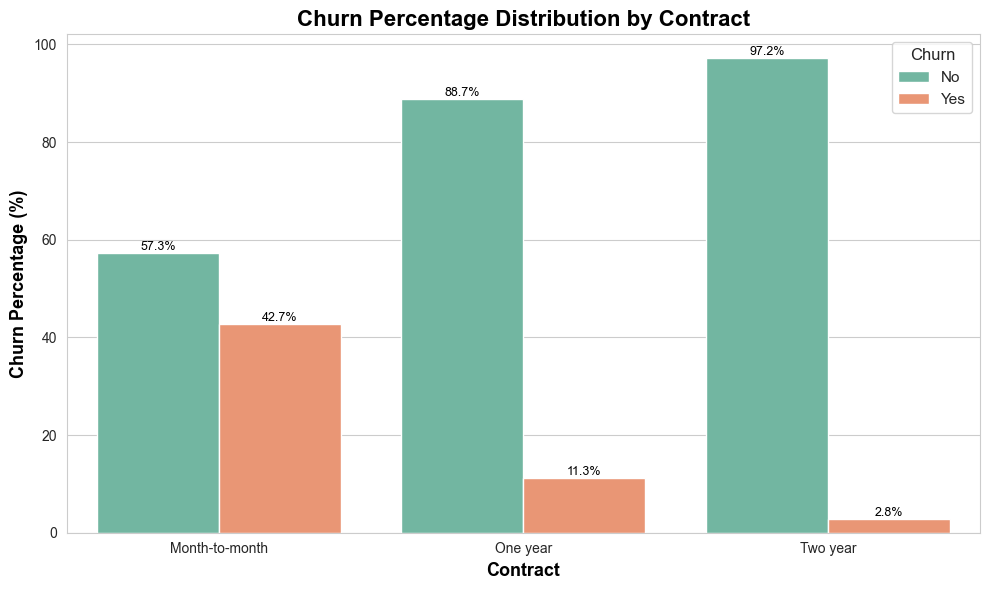

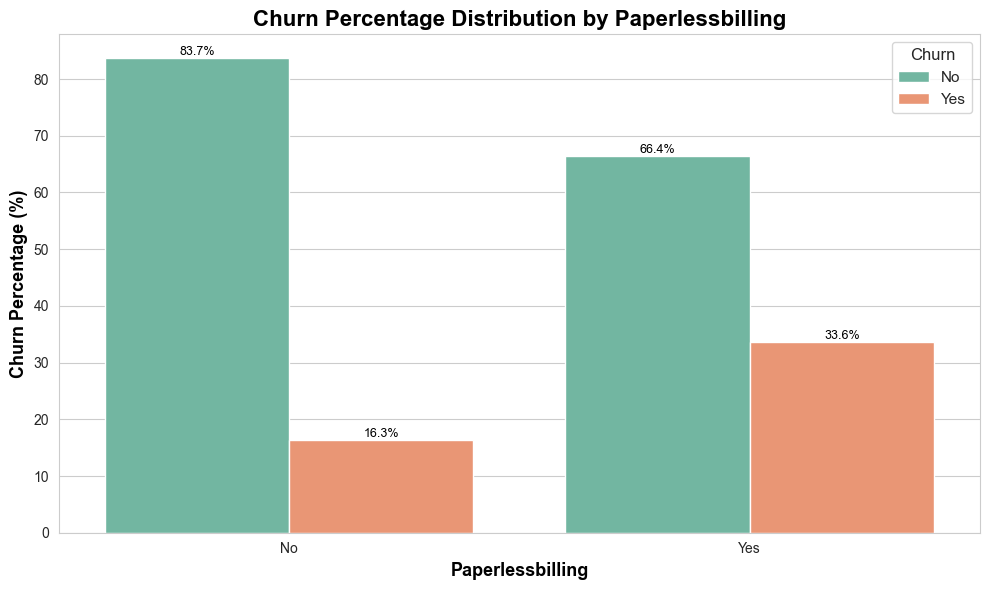

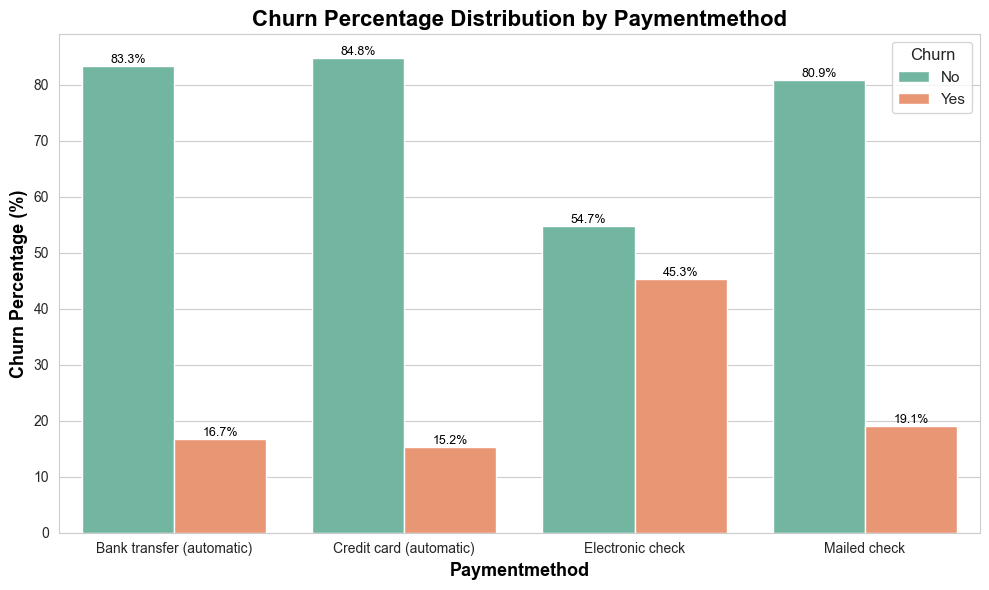

C:\Users\moham\AppData\Local\Temp\ipykernel_16248\3130596564.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = data.groupby([predictor, 'Churn']).size()
C:\Users\moham\AppData\Local\Temp\ipykernel_16248\3130596564.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_totals = group_sizes.groupby(level=0).transform('sum')


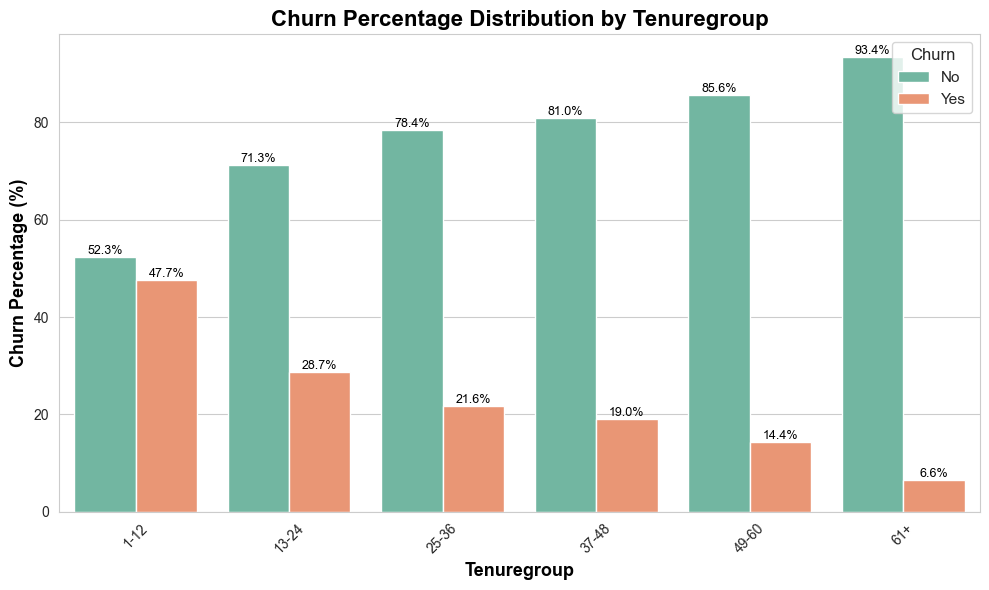

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style and palette
sns.set_style("whitegrid")
palette = "Set2"

# Loop through predictors
for predictor in data.drop(columns=['customerID', 'Churn', 'TotalCharges', 'MonthlyCharges','tenure']):
    plt.figure(figsize=(10, 6))

    # Create % dataframe using NumPy for better performance
    group_sizes = data.groupby([predictor, 'Churn']).size()
    group_totals = group_sizes.groupby(level=0).transform('sum')
    percentage_df = (100 * group_sizes / group_totals).reset_index(name='Percentage')

    # Plot barplot with percentages
    ax = sns.barplot(
        data=percentage_df,
        x=predictor,
        y='Percentage',
        hue='Churn',
        palette=palette
    )

    # Rotate x-axis labels if needed
    if data[predictor].nunique() > 4:
        plt.xticks(rotation=45)

    # Titles and labels in black
    plt.title(f"Churn Percentage Distribution by {predictor.replace('_', ' ').title()}",
              fontsize=16, fontweight='bold', color='black')
    plt.xlabel(predictor.replace("_", " ").title(), fontsize=13, fontweight='bold', color='black')
    plt.ylabel("Churn Percentage (%)", fontsize=13, fontweight='bold', color='black')

    # Add % labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, color='black')

    # Final layout
    plt.legend(title="Churn", title_fontsize=12, fontsize=11, loc='upper right')
    plt.tight_layout()
    plt.show()


## Numerical Analysis

In [39]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [40]:
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [44]:
new_data0 = data.loc[data['Churn']=="Yes"]
new_data1 = data.loc[data['Churn']=="No"]

In [42]:
new_data0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1-12
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49-60


In [45]:
new_data0['Churn'].value_counts()

Churn
Yes    1869
Name: count, dtype: int64

In [46]:
new_data0['gender'].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

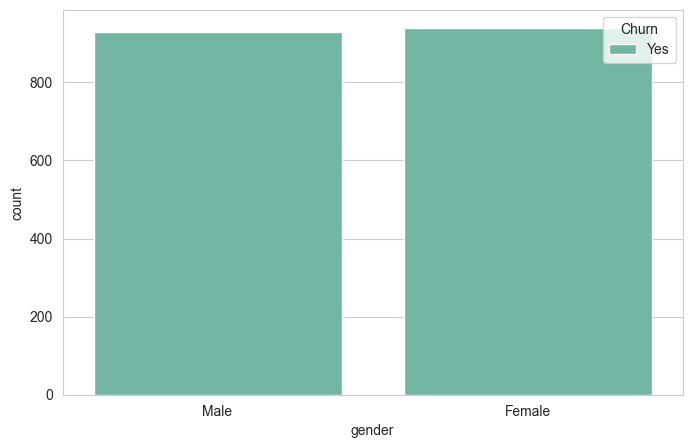

In [50]:
palette = "Set2"
plt.figure(figsize=(8, 5))
sns.countplot(data = new_data0, x = 'gender', hue='Churn',palette=palette)
plt.show()

In [51]:
payment_method_churn = data.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')
print(payment_method_churn)

               PaymentMethod Churn  Count
0  Bank transfer (automatic)    No   1286
1  Bank transfer (automatic)   Yes    258
2    Credit card (automatic)    No   1290
3    Credit card (automatic)   Yes    232
4           Electronic check    No   1294
5           Electronic check   Yes   1071
6               Mailed check    No   1304
7               Mailed check   Yes    308


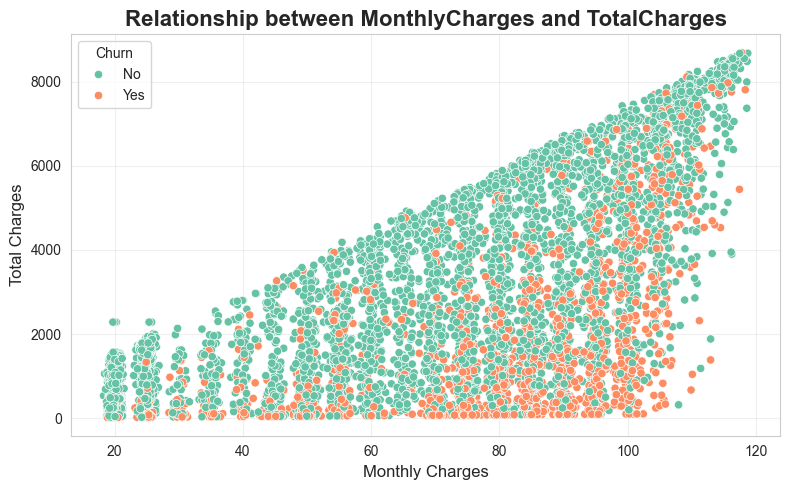

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette=palette)

# Add titles and labels
plt.title('Relationship between MonthlyCharges and TotalCharges', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Total Charges', fontsize=12)

# Add gridlines for better readability
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
print(f'The correlation between MonthlyCharges and TotalCharges is: {round(data['MonthlyCharges'].corr(data['TotalCharges']),2)}')

The correlation between MonthlyCharges and TotalCharges is: 0.65


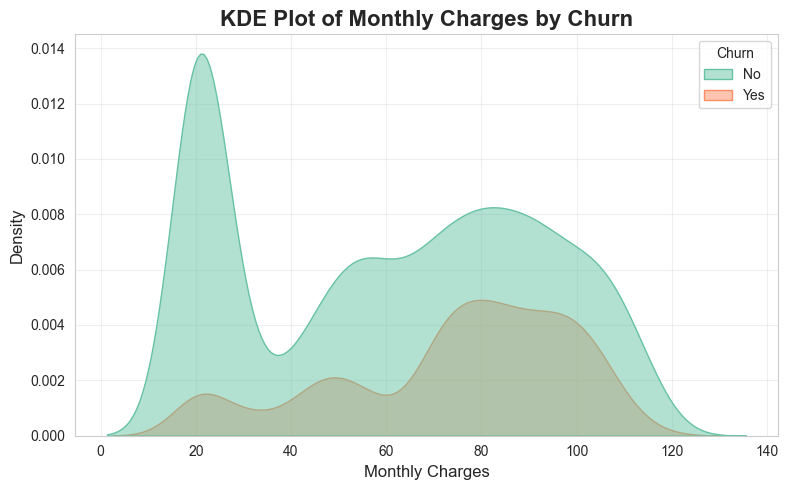

In [58]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True, palette=palette, alpha=0.5)

# Add titles and labels
plt.title('KDE Plot of Monthly Charges by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add gridlines for better readability
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_16248\878553085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette="coolwarm")


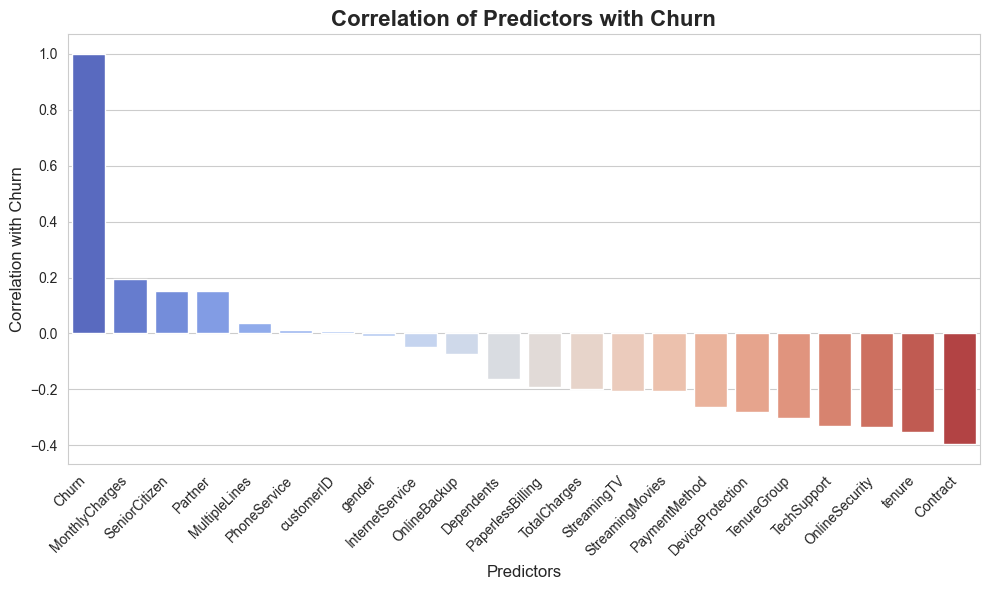

In [61]:
# Sort the correlation values with respect to Churn
sorted_correlation = churn_correlation.sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette="coolwarm")

# Add titles and labels
plt.title("Correlation of Predictors with Churn", fontsize=16, fontweight='bold')
plt.xlabel("Predictors", fontsize=12)
plt.ylabel("Correlation with Churn", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()